Exception ignored in: <function Image.__del__ at 0x0000021405D835B0>
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 4046, in __del__
    self.tk.call('image', 'delete', self.name)
KeyboardInterrupt: 


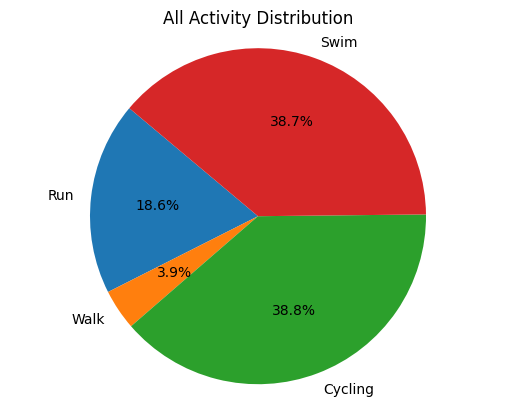

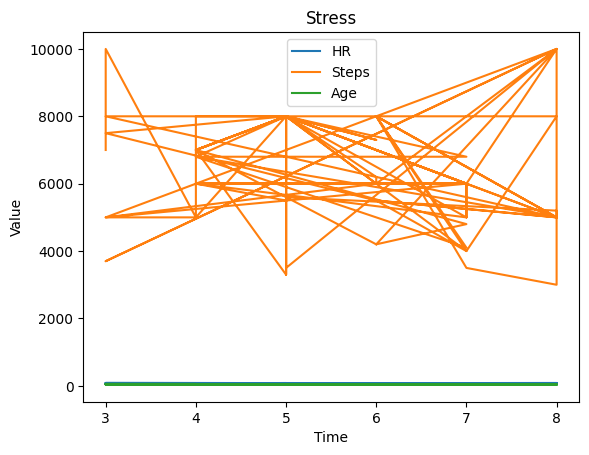

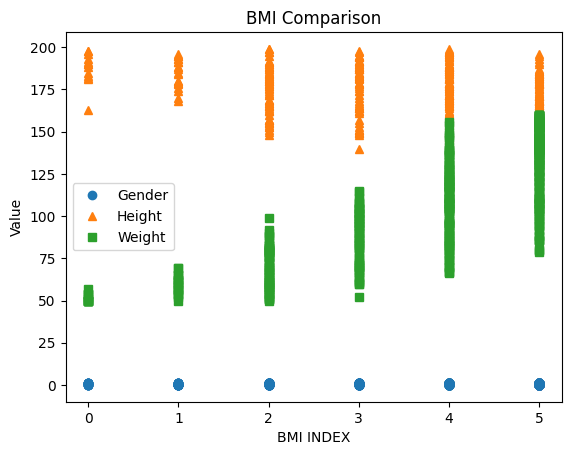

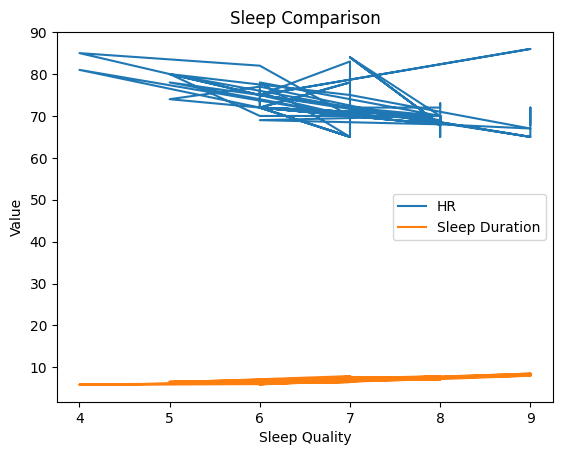

In [48]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load data
data = pd.read_csv("HAR.csv", header='infer').values
df = pd.read_csv("bmi.csv", header='infer').values
df1 = pd.read_csv("sleep.csv", header='infer').values

# Define machine learning models
k = 5
x = data[:, 0:-1]
y = data[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
activity_model = KNeighborsClassifier(n_neighbors=k, weights='distance')
activity_model.fit(x_train, y_train)

bmi_model = KNeighborsClassifier(n_neighbors=k, weights='distance')
x1 = df[:, 0:-1]
y1 = df[:, -1]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)
bmi_model.fit(x1_train, y1_train)

sleep_model = KNeighborsClassifier(n_neighbors=k, weights='distance')
x2 = df1[:, 0:-2]
y2 = df1[:, -2:]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2)
sleep_model.fit(x2_train, y2_train)

# Define GUI
root = tk.Tk()
root.title("Health and Activity Tracker")

# Function to display the graph
def display_graph():
    fig1, ax1 = plt.subplots()
    # Data for the pie chart
    act = ['Run','Walk','Cycling','Swim']
    p = (data[data[:, -1] == 0, -1].shape[0]/7733)*100
    q = (data[data[:, -1] == 1, -1].shape[0]/7733)*100
    r = (data[data[:, -1] == 2, -1].shape[0]/7733)*100
    t = (data[data[:, -1] == 3, -1].shape[0]/7733)*100
    
    sizes = [p, q, r, t]
    ax1.pie(sizes, labels=act, autopct='%1.1f%%', startangle=140)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.set_title('All Activity Distribution')  # Set the title of the plot
    canvas1 = FigureCanvasTkAgg(fig1, master=tab1)
    canvas1.draw()
    canvas1.get_tk_widget().grid(row=0, column=0, padx=10, pady=10)

    fig2, ax2 = plt.subplots()
    # Sample data for x-axis
    x1 = df1[:,-1]
    # Sample data for y-axis (three columns)
    y11 = df1[:,3]
    y21 = df1[:,2]
    y31 = df1[:,1]
    # Plotting the stress chart
    ax2.plot(x1, y11, label='HR')
    ax2.plot(x1, y21, label='Steps')
    ax2.plot(x1, y31, label='Age')
    ax2.set_title('Stress')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Value')
    ax2.legend()  # Adding legend for clarity
    canvas2 = FigureCanvasTkAgg(fig2, master=tab1)
    canvas2.draw()
    canvas2.get_tk_widget().grid(row=0, column=1, padx=10, pady=10)
    
    fig3, ax3 = plt.subplots()
    # Sample data for x-axis
    x = df[:,-1]
    # Sample data for y-axis (three columns)
    y1 = df[:,0]
    y2 = df[:,1]
    y3 = df[:,2]
    # Plotting the BMI comparison chart
    ax3.plot(x, y1, 'o', label='Gender')
    ax3.plot(x, y2, '^', label='Height')
    ax3.plot(x, y3, 's', label='Weight')
    ax3.set_title('BMI Comparison')
    ax3.set_xlabel('BMI INDEX')
    ax3.set_ylabel('Value')
    ax3.legend()  # Adding legend for clarity
    canvas3 = FigureCanvasTkAgg(fig3, master=tab1)
    canvas3.draw()
    canvas3.get_tk_widget().grid(row=1, column=0, padx=10, pady=10)
    
    fig4, ax4 = plt.subplots()
    # Sample data for x-axis
    x = df1[:,-2]
    # Sample data for y-axis (two columns)
    y1 = df1[:,3]
    y2 = df1[:,4]
    # Plotting the sleep comparison chart
    ax4.plot(x, y1, label='HR')
    ax4.plot(x, y2, label='Sleep Duration')
    ax4.set_title('Sleep Comparison')
    ax4.set_xlabel('Sleep Quality')
    ax4.set_ylabel('Value')
    ax4.legend()  # Adding legend for clarity
    canvas4 = FigureCanvasTkAgg(fig4, master=tab1)
    canvas4.draw()
    canvas4.get_tk_widget().grid(row=1, column=1, padx=10, pady=10)

# Create tabs
tabControl = ttk.Notebook(root)
tab1 = ttk.Frame(tabControl)
tab2 = ttk.Frame(tabControl)
tabControl.add(tab1, text='Graph Display')
tabControl.add(tab2, text='ML Output')
tabControl.grid(row=0, column=0, sticky="nsew")

display_graph()

# Function to run the machine learning code and display output
def run_ml_code():
    # Tkinter GUI
    weight = float(weight_entry.get())
    height = float(height_entry.get())
    gender = gender_var.get()  # Getting the selected gender value from the variable
    age = float(a_entry.get())
    bmi = bmi_model.predict([[gender, height, weight]])
    act = ['Run','Walk','Cycling','Swim']
    b = ['underweight','normal','overweight']
    if bmi<3:
        x=0
    elif bmi > 3:
        x=2
    else:
        x=1
    activity = activity_model.predict([[2.605, 7.245, -0.086, 4.167, 8.872, 0.295, -1.214, -4.87, 0.053, 0.542, 1.026, 0.033]])
    sleep_quality = sleep_model.predict([[gender,age,10000,75,6.2]])
    gb = ['good','moderate','bad']     
    if int(sleep_quality[0][0])<4:
        y=2
    elif int(sleep_quality[0][0])> 6:
        y = 0
    else:
        y=1
    if int(sleep_quality[0][1])<4:
        z=2
    elif int(sleep_quality[0][1])> 6:
         z = 0
    else:
        z=1
    result_label.config(text = f"Activity: {act[int(activity)]} , BMI : {b[x]} { bmi} , Sleep Quality: {gb[y]} , & Stress Level: {gb[z]} ")
    if  y == 2 and z == 2 and x == 1  :
        routine = "Morning Yoga, Breakfast, Work, Lunch, Work, Evening Meditation, Dinner, Relaxation"
        goal = "Do Yoga And Maintain Yourself Good"
    elif  y == 0 and z == 0 and (x == 0 or x == 2) :
        routine = "Morning Workout, Breakfast, Work, Lunch, Work, Evening Workout, Dinner, Relaxation"
        
    else:
        routine = "Morning Walk, Breakfast, Work, Lunch, Work, Evening Workout, Dinner, Relaxation"
        if x == 0:
            goal = "Need Improvement...Do bulking"
        elif x == 2:    
            goal = "Need Improvement...Do Weight Loss Practise or Cardio"
        elif x == 1:    
            goal = "Do Yoga And Maintain Yourself, Average."
            
    r_label.config(text="Suggestions :\n" + goal)
    routine_label.config(text="Daily Routine :\n" + routine)


# Add widgets to tab2 (ML Output)
weight_label = tk.Label(tab2, text="Weight (kg): ")
weight_label.grid(row=2, column=0, padx=10, pady=10)
weight_entry = tk.Entry(tab2)
weight_entry.grid(row=2, column=1, padx=10, pady=10)

a_label = tk.Label(tab2, text="Age: ")
a_label.grid(row=3, column=0, padx=10, pady=10)
a_entry = tk.Entry(tab2)
a_entry.grid(row=3, column=1, padx=10, pady=10)

height_label = tk.Label(tab2, text="Height (cm): ")
height_label.grid(row=1, column=0, padx=10, pady=10)
height_entry = tk.Entry(tab2)
height_entry.grid(row=1, column=1, padx=10, pady=10)

gen_label = tk.Label(tab2, text="Gender: ")
gen_label.grid(row=0, column=0, padx=10, pady=10)

gender_var = tk.IntVar()  # Variable to store the selected gender value
male_radio = tk.Radiobutton(tab2, text="Male", variable=gender_var, value=0)
male_radio.grid(row=0, column=1, padx=10, pady=10)

female_radio = tk.Radiobutton(tab2, text="Female", variable=gender_var, value=1)
female_radio.grid(row=0, column=2, padx=10, pady=10)

generate_button = tk.Button(tab2, text="Generate Daily Routine", command=run_ml_code, bg="#4CAF50", fg="white")
generate_button.grid(row=4, column=0, columnspan=3, padx=10, pady=10)

result_label = tk.Label(tab2, text="", fg="red", font=("Arial", 12))
result_label.grid(row=5, column=0, columnspan=3, padx=10, pady=10)

routine_label = tk.Label(tab2, text="", fg="blue", font=("Arial", 12))
routine_label.grid(row=6, column=0, columnspan=3, padx=10, pady=10)

r_label = tk.Label(tab2, text="", fg="green", font=("Arial", 12))
r_label.grid(row=7, column=0, columnspan=3, padx=10, pady=10)

root.mainloop()